In [1]:
#AutoEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../DATA/UK_foods.csv',index_col='Unnamed: 0')

In [3]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [4]:
#17 columns 
df.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


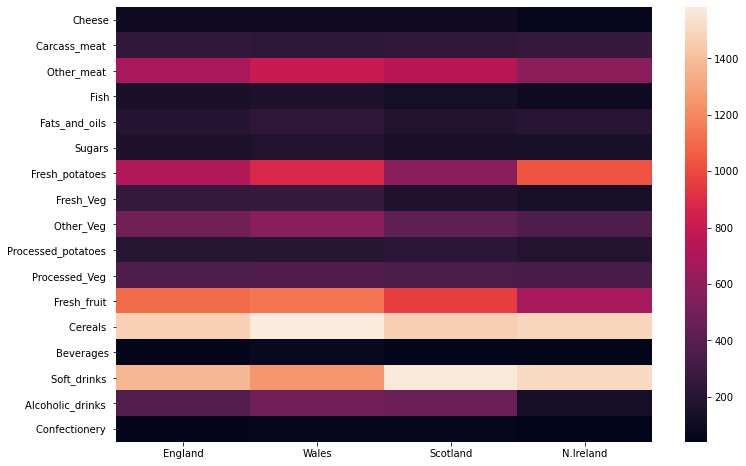

In [9]:
plt.figure(figsize = (12,8))
sns.heatmap(df)

In [11]:
#Creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape,Flatten,Dense
from tensorflow.keras.optimizers import SGD

In [12]:
encoder = Sequential()

encoder.add(Dense(8,activation = 'relu',input_shape=[17]))
encoder.add(Dense(4,activation = 'relu',input_shape=[8]))
encoder.add(Dense(2,activation = 'relu',input_shape=[4]))

In [13]:
decoder = Sequential()

decoder.add(Dense(4,activation = 'relu',input_shape=[2]))
decoder.add(Dense(8,activation = 'relu',input_shape=[4]))
decoder.add(Dense(17,activation = 'relu',input_shape=[8]))

In [17]:
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(optimizer = SGD(lr=1.5),loss='mse',metrics=['accuracy'])

In [18]:
autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 2)                 190       
_________________________________________________________________
sequential_1 (Sequential)    (None, 17)                205       
Total params: 395
Trainable params: 395
Non-trainable params: 0
_________________________________________________________________


In [19]:
#Scale the data

from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.transpose().values)

In [22]:
scaled_data

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

In [23]:
autoencoder.fit(scaled_data,scaled_data,epochs=15)

Epoch 1/15
1/1 [==============================] - 0s 996us/step - loss: 0.4266 - accuracy: 0.0000e+00
Epoch 2/15
1/1 [==============================] - 0s 2ms/step - loss: 0.3589 - accuracy: 0.0000e+00
Epoch 3/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2941 - accuracy: 0.0000e+00
Epoch 4/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2667 - accuracy: 0.0000e+00
Epoch 5/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2566 - accuracy: 0.0000e+00
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2525 - accuracy: 0.0000e+00
Epoch 7/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2504 - accuracy: 0.0000e+00
Epoch 8/15
1/1 [==============================] - 0s 11ms/step - loss: 0.2489 - accuracy: 0.0000e+00
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2475 - accuracy: 0.0000e+00
Epoch 10/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2460 - accuracy: 0.0000e

In [24]:
#Reduced the columns from 17 to 2 and predicts the result
encoder_df = encoder.predict(scaled_data)

In [25]:
encoder_df

array([[1.1742051 , 0.        ],
       [1.5134118 , 0.        ],
       [0.69126433, 0.        ],
       [0.        , 0.        ]], dtype=float32)

In [26]:
#Join it with original data
df.columns

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [30]:
joined_data = pd.DataFrame(data = encoder_df,index = df.transpose().index,columns = ['C1','C2'])

In [42]:
joined_data = joined_data.reset_index()

In [43]:
joined_data

,index,C1,C2
0,England,1.174205,0.0
1,Wales,1.513412,0.0
2,Scotland,0.691264,0.0
3,N.Ireland,0.000000,0.0


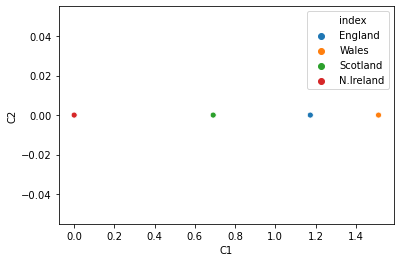

In [44]:
#Results based on only encoder
sns.scatterplot(x = 'C1',y = 'C2',data = joined_data,hue='index')